### AlexNet

In [2]:
from torch.onnx.symbolic_opset11 import unsqueeze
from torchvision import models
from torchinfo import summary

from Scratch3.dezero.models import ResNet

model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
summary(model, input_size=(1, 3, 224, 224))  # batch size 추가

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [5]:
import torch
from PIL import Image
from torchvision import transforms, models

transform = transforms.Compose([transforms.Resize((244,244)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1').eval().to(device)

tensors = []
files = ["./datasets/images/airplane.jpg", "./datasets/images/bus.jpg"]
for file in files:
    img = Image.open(file)
    tensors.append(transform(img))

tensor = torch.stack(tensors)
print(f"tensor shape : {tensor.shape}")

tensor shape : torch.Size([2, 3, 244, 244])


In [6]:
with open("./datasets/imagenet_classes.txt", "r") as file:
    classes = file.read().splitlines()

print(f"클래스 개수 : {len(classes)}")
print(f"첫 번째 클래스 레이블 : {classes[0]}")

클래스 개수 : 1000
첫 번째 클래스 레이블 : tench


In [7]:
import numpy as np
from torch.nn import functional as F

with torch.no_grad():
    output = model(tensor.to(device))
    probs = F.softmax(output, dim=-1)
    top_probs, top_idxs = probs.topk(5)

top_probs = top_probs.cpu().numpy()
top_idxs = top_idxs.cpu().numpy()
top_classes = np.array(classes)[top_idxs]

for idx, (cls, prob) in enumerate(zip(top_classes, top_probs)):
    print(f"{files[idx]} : 추론결과")
    for c, p in zip(cls, prob):
        print(f"{c:<30} : {p*100:>5.2f}%")


airliner : 0.76
warplane : 0.11
wing : 0.10
space shuttle : 0.03
missile : 0.00
trolleybus : 0.54
streetcar : 0.41
minibus : 0.04
passenger car : 0.01
police van : 0.00


### VGG16

In [91]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

hyperparams = {
    "batch_size": 4,
    "learning_rate": 0.001,
    "epochs" : 5,
    "trainsform": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48235, 0.45882, 0.40784],
                             std=[1.0/255.0, 1.0/255.0, 1.0/255.0])
    ])
}

train_dataset = ImageFolder("./datasets/pet/train", transform=hyperparams['trainsform'])
test_dataset = ImageFolder("./datasets/pet/test", transform=hyperparams['trainsform'])

train_loader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True)

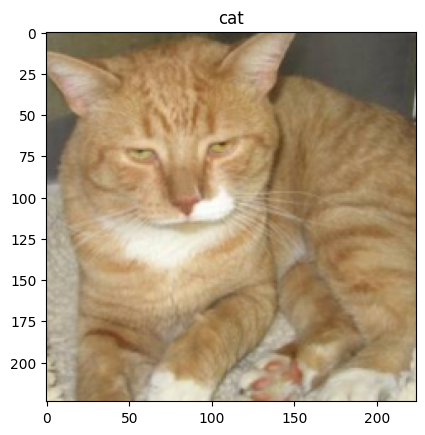

In [92]:
import numpy as np
from matplotlib import pyplot as plt

mean = [0.48235, 0.45882, 0.40784]
std = [1.0/255.0, 1.0/255.0, 1.0/255.0]

images, labels = next(iter(train_loader))
for image, label in zip(images, labels):
    image = image.numpy().transpose(1, 2, 0)
    image = ((std * image + mean) *255).astype(np.uint8)

    plt.imshow(image)
    plt.title(train_loader.dataset.classes[int(label)])
    plt.show()
    break

In [93]:
from torchvision import models

model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [95]:
from torch import nn

model.classifier[6] = nn.Linear(4096, len(train_loader.dataset.classes))

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F

from torch.utils.data import DataLoader
from torchvision import models
from torchvision.datasets import ImageFolder
from torchvision import transforms

hyperparams = {
    "batch_size": 32,
    "learning_rate": 0.0001,
    "epochs" : 5,
    "trainsform": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48235, 0.45882, 0.40784],
                             std=[1.0/255.0, 1.0/255.0, 1.0/255.0])
    ])
}

train_dataset = ImageFolder("./datasets/pet/train", transform=hyperparams['trainsform'])
test_dataset = ImageFolder("./datasets/pet/test", transform=hyperparams['trainsform'])

train_dataloader = DataLoader(train_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True)

model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
model.classifier[6] = nn.Linear(4096, len(train_dataloader.dataset.classes))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'])

for epoch in range(hyperparams['epochs']):
    cost = 0.0

    for images, classes in train_dataloader:
        images = images.to(device)
        classes = classes.to(device)

        outputs = model(images)
        loss = criterion(outputs, classes)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)
    print(f"epoch : {epoch+1}, cost : {cost:.4f}")

with torch.no_grad():
    model.eval()

    accuracy = 0.0
    for images, classes in test_dataloader:
        images = images.to(device)
        classes = classes.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        outputs_classes = torch.argmax(outputs, dim=1)

        accuracy += int(torch.eq(classes, outputs_classes).sum())
    print(f"acc@1 : {accuracy / (len(test_dataloader) * hyperparams['batch_size']) * 100:.2f}%")

torch.save(model.state_dict(), "./models/VGG16.pt")

print("Save the model wegiths")


### ResNet

In [84]:
from torch import nn

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or inplanes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inplanes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(x)
        out = self.relu(out)

        return out

In [85]:
class BottleneckBlock(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion * planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion * planes)
        self.relu = nn.ReLU(inplace=True)

        self.shortcut = nn.Sequential()
        if stride != 1 or inplanes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inplanes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)

        out += self.shortcut(x)
        out = self.relu(out)

        return out

In [87]:
import torch
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super().__init__()

        self.inplanes = 64
        self.stm = nn.Sequential(
            nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(self.inplanes),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.stage1 = self._make_layer(block, 64, layers[0], stride=1)
        self.stage2 = self._make_layer(block, 128, layers[1], stride=2)
        self.stage3 = self._make_layer(block, 256, layers[2], stride=2)
        self.stage4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride=1):
        layers = []
        layers.append(block(self.inplanes, planes, stride))
        self.inplanes = planes * block.expansion
        for _ in range(num_blocks-1):
            layers.append(block(self.inplanes, planes, 1))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.stm(x)
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [88]:
from  torchvision import models
from torchinfo import summary

resnet18 = ResNet(BasicBlock, [2, 2, 2, 2], 1000)
resnet34 = ResNet(BasicBlock, [3, 4, 6, 3], 1000)
resnet50 = ResNet(BottleneckBlock, [3, 4, 6, 3], 1000)
resnet101 = ResNet(BottleneckBlock, [3, 4, 23, 3], 1000)
resnet152 = ResNet(BottleneckBlock, [3, 8, 36, 3], 1000)
torch_model = models.resnet34(weights='ResNet34_Weights.IMAGENET1K_V1')

resnet34_info = summary(torch_model, (1, 3, 224, 224), verbose=0)
torch_model_info = summary(torch_model, (1, 3, 224, 224), verbose=0)

print(resnet34_info.total_params)
print(torch_model_info.total_params)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/chohi/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 35.9MB/s]


21797672
21797672


### CAM

In [50]:
from torch import nn
from torchvision import models


model = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1').eval()
features = nn.Sequential(*list(model.children())[:-2])

In [59]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image = Image.open('./datasets/images/airplane.jpg')
target = transform(image).unsqueeze(0)

output = model(target)
class_idx = int(output.argmax())

weights = model.fc.weight[class_idx].reshape(-1, 1, 1)
features_output = features(target).squeeze()

print(weights.shape)
print(features_output.shape)

torch.Size([512, 1, 1])
torch.Size([512, 7, 7])


In [63]:
import torch
from torch.nn import functional as F

cam = features_output * weights
cam = torch.sum(cam, dim=0)
cam = F.interpolate(
    input=cam.unsqueeze(0).unsqueeze(0),
    size=(image.size[1], image.size[0]),
    mode="bilinear",
    align_corners=False
).squeeze().detach().numpy()

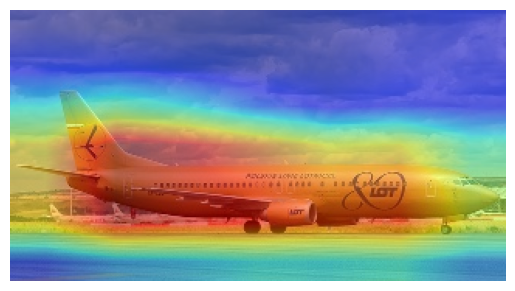

In [64]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.imshow(cam, cmap="jet", alpha=0.5)
plt.axis('off')
plt.show()

### Grad-CAM

In [76]:
import torch

class GradCAM:
    def __init__(self, model, main, sub):
        self.model = model.eval()
        self.register_hooks(main, sub)

    def register_hooks(self, main, sub):
        for name, module in self.model.named_children():
            if name == main:
                for sub_name, sub_module in module[-1].named_children():
                    if sub_name == sub:
                        sub_module.register_forward_hook(self.forward_hook)
                        sub_module.register_full_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        self.feature_map = output

    def backward_hook(self, module, grad_input, grad_output):
        self.grad_input = grad_output[0]

    def __call__(self, x):
        output = self.model(x)

        index = output.argmax(axis=1)
        one_hot = torch.zeros_like(output)
        for i in range(output.size(0)):
            one_hot[i][index[i]] = 1

        self.model.zero_grad()
        output.backward(gradient=one_hot, retain_graph=True)

        a_k = torch.mean(self.grad_input, dim=(2,3), keepdim=True)
        grad_cam = torch.sum(a_k * self.feature_map, dim=1)
        grad_cam = torch.relu(grad_cam)
        return grad_cam

In [77]:
from PIL import Image
from torch.nn import functional as F
from torchvision import models, transforms
from matplotlib import pyplot as plt

transform = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

files = [
    "./datasets/images/airplane.jpg",
    "./datasets/images/bus.jpg",
    "./datasets/images/cat.jpg",
    "./datasets/images/dog.jpg",
    "./datasets/images/african_hunting_dog.jpg"
]

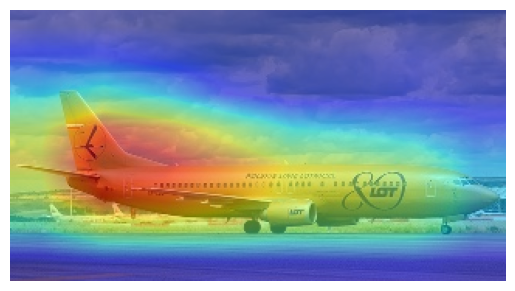

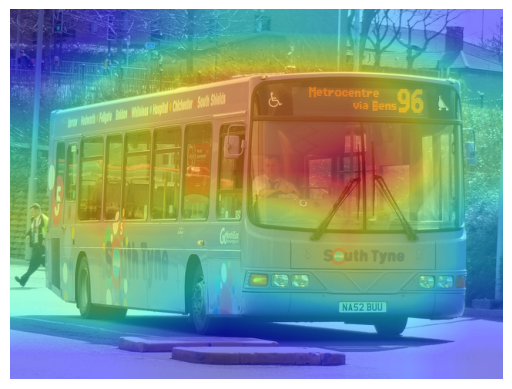

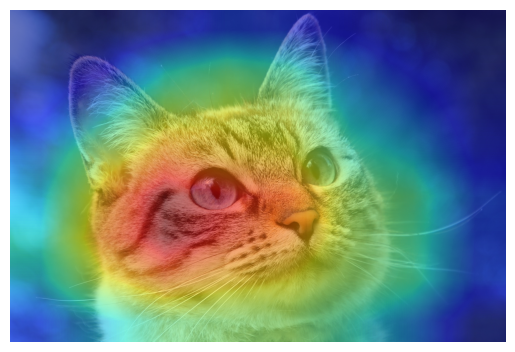

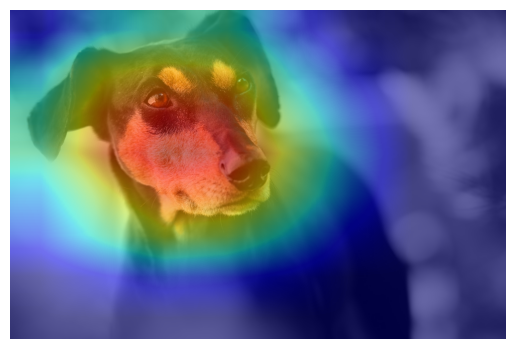

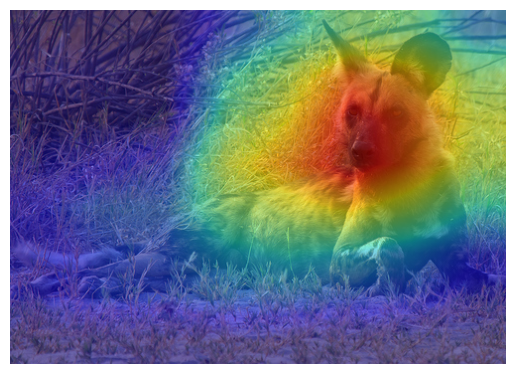

In [80]:
images, tensors = [], []
for file in files:
    image = Image.open(file)
    images.append(image)
    tensors.append(transform(image))
tensors = torch.stack(tensors)

model = GradCAM(
    model = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1'),
    main="layer4",
    sub="conv2"
)
grad_cams = model(tensors)

for idx, image in enumerate(images):
    grad_cam = F.interpolate(
        input=grad_cams[idx].unsqueeze(0).unsqueeze(0),
        size=(image.size[1], image.size[0]),
        mode="bilinear"
    ).squeeze().detach().numpy()

    plt.imshow(image)
    plt.imshow(grad_cam, cmap="jet", alpha=0.5)
    plt.axis('off')
    plt.show()
